<a href="https://colab.research.google.com/github/Zakir-ai/data-wrangling-with-python/blob/main/Google_Play_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

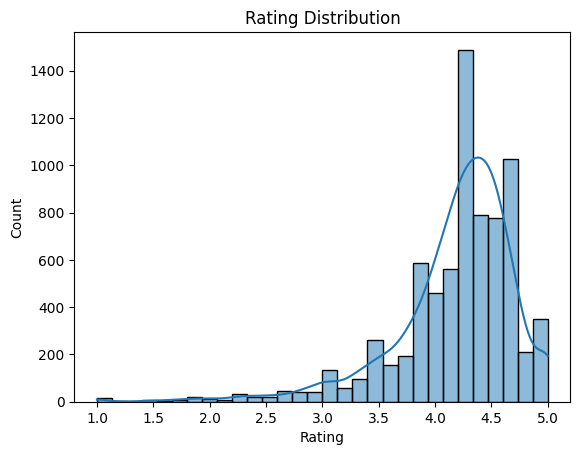

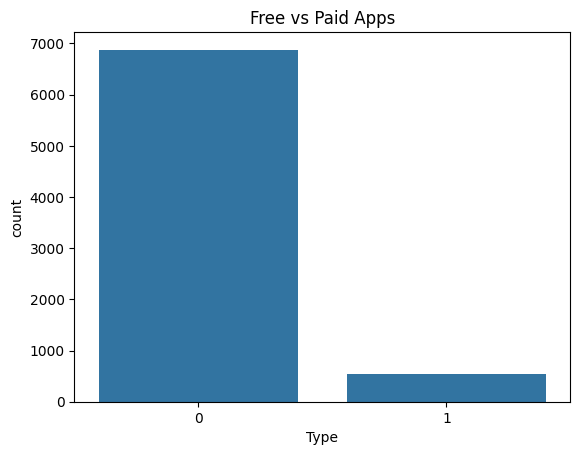

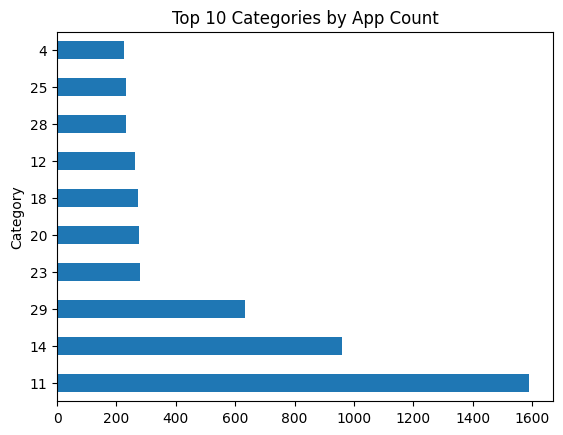

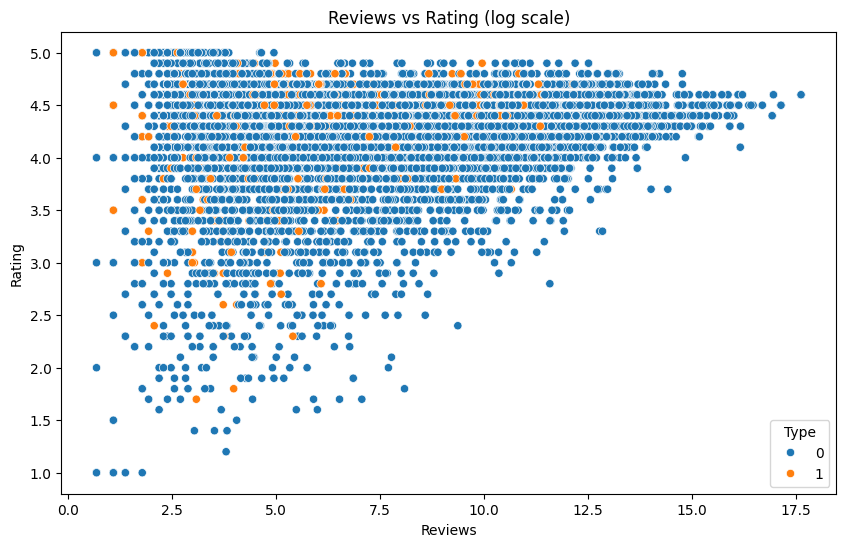

📉 Mean Squared Error: 0.29
📈 R² Score: 0.0897


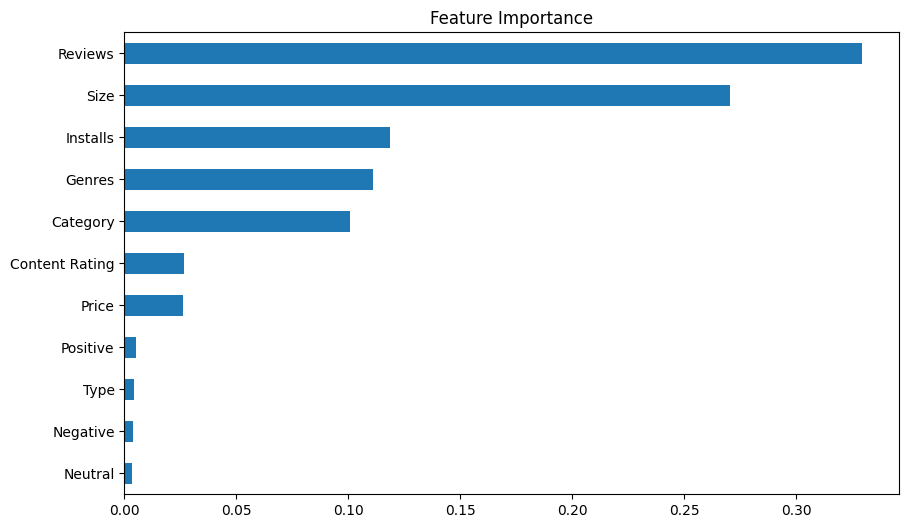

In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# 2. Load Datasets
apps = pd.read_csv("/content/googleplaystore.csv")
reviews = pd.read_csv("/content/googleplaystore_user_reviews.csv")

# 3. Initial Cleanup
apps = apps[apps['Category'] != '1.9']  # Remove corrupted row
apps.drop_duplicates(inplace=True)
apps.dropna(subset=['Rating', 'Reviews', 'Size', 'Installs'], inplace=True)

# 4. Clean Reviews
apps['Reviews'] = apps['Reviews'].replace('3.0M', 3000000).astype(float)

# 5. Clean Size Column
def size_converter(val):
    if 'M' in val:
        return float(val.replace('M', '')) * 1024  # Convert to KB
    elif 'k' in val:
        return float(val.replace('k', ''))
    else:
        return np.nan

apps['Size'] = apps['Size'].replace('Varies with device', np.nan)
apps['Size'] = apps['Size'].apply(lambda x: size_converter(str(x)))

# 6. Clean Installs Column
apps['Installs'] = apps['Installs'].str.replace('[+,]', '', regex=True)
apps['Installs'] = apps['Installs'].replace('Free', np.nan).astype(float)

# 7. Clean Price Column
apps['Price'] = apps['Price'].str.replace('$', '', regex=False)
apps['Price'] = apps['Price'].replace('Everyone', np.nan)
apps['Price'] = apps['Price'].astype(float)

# 8. Drop remaining missing values in important columns
apps.dropna(subset=['Size', 'Installs', 'Price'], inplace=True)

# 9. Clean user reviews dataset
reviews.dropna(subset=['Translated_Review', 'Sentiment'], inplace=True)

# 10. Add Sentiment Scores to Main Dataset
sentiments = reviews.groupby('App')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)
apps = apps.merge(sentiments, on='App', how='left')

# 11. Encode Categorical Columns
le = LabelEncoder()
for col in ['Category', 'Genres', 'Content Rating', 'Type']:
    apps[col] = le.fit_transform(apps[col].astype(str))

# 12. EDA Examples (Optional Visuals)
# Rating distribution
sns.histplot(apps['Rating'], bins=30, kde=True)
plt.title("Rating Distribution")
plt.show()

# Free vs Paid
sns.countplot(x='Type', data=apps)
plt.title("Free vs Paid Apps")
plt.show()

# Category Count
apps['Category'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Categories by App Count")
plt.show()

# Reviews vs Rating (log-scale)
plt.figure(figsize=(10,6))
sns.scatterplot(x=np.log1p(apps['Reviews']), y=apps['Rating'], hue=apps['Type'])
plt.title("Reviews vs Rating (log scale)")
plt.show()

# 13. Prepare Data for ML
features = ['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Genres', 'Content Rating']
if 'Positive' in apps.columns:
    features += ['Positive', 'Negative', 'Neutral']

X = apps[features]
y = apps['Rating'].fillna(apps['Rating'].median())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 14. Train Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 15. Predict & Evaluate
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📉 Mean Squared Error: {mse:.2f}")
print(f"📈 R² Score: {r2:.4f}")

# 16. Feature Importance
feat_importance = pd.Series(model.feature_importances_, index=features)
feat_importance.sort_values().plot(kind='barh', figsize=(10,6), title="Feature Importance")
plt.show()


✅ Linear Regression — MSE: 0.07, R²: 0.1118
✅ Decision Tree — MSE: 0.10, R²: -0.3849
✅ Support Vector Regressor — MSE: 0.07, R²: 0.0289
✅ Random Forest — MSE: 0.05, R²: 0.3219
✅ Gradient Boosting — MSE: 0.06, R²: 0.2459

🔍 Model Comparison:

                      Model       MSE  R2 Score
3             Random Forest  0.050316  0.321924
4         Gradient Boosting  0.055959  0.245872
0         Linear Regression  0.065908  0.111797
2  Support Vector Regressor  0.072058  0.028916
1             Decision Tree  0.102765 -0.384903


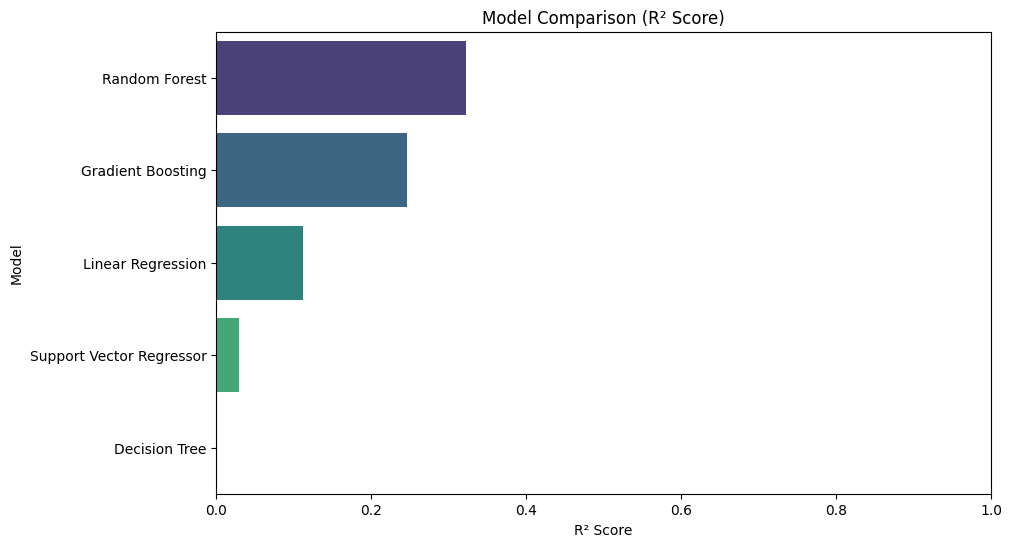

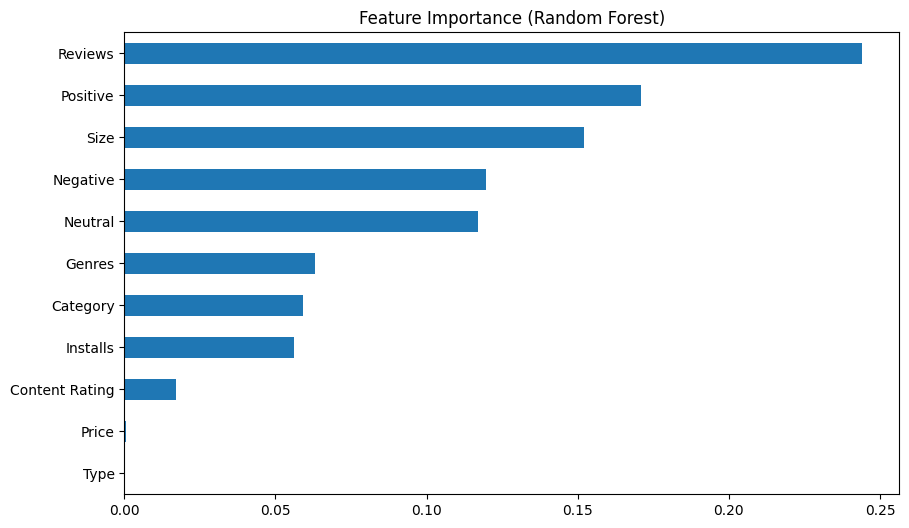

In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# 2. Load Datasets
apps = pd.read_csv("googleplaystore.csv")
reviews = pd.read_csv("googleplaystore_user_reviews.csv")

# 3. Clean Main Dataset
apps = apps[apps['Category'] != '1.9']
apps.drop_duplicates(inplace=True)
apps.dropna(subset=['Rating', 'Reviews', 'Size', 'Installs'], inplace=True)

# 4. Clean Reviews
apps['Reviews'] = apps['Reviews'].replace('3.0M', 3000000).astype(float)

# 5. Clean Size
def size_converter(val):
    if 'M' in val:
        return float(val.replace('M', '')) * 1024
    elif 'k' in val:
        return float(val.replace('k', ''))
    else:
        return np.nan

apps['Size'] = apps['Size'].replace('Varies with device', np.nan)
apps['Size'] = apps['Size'].apply(lambda x: size_converter(str(x)))

# 6. Clean Installs
apps['Installs'] = apps['Installs'].str.replace('[+,]', '', regex=True)
apps['Installs'] = apps['Installs'].replace('Free', np.nan).astype(float)

# 7. Clean Price
apps['Price'] = apps['Price'].str.replace('$', '', regex=False)
apps['Price'] = apps['Price'].replace('Everyone', np.nan)
apps['Price'] = apps['Price'].astype(float)

# 8. Drop Remaining NaNs
apps.dropna(subset=['Size', 'Installs', 'Price'], inplace=True)

# 9. Clean Reviews Dataset
reviews.dropna(subset=['Translated_Review', 'Sentiment'], inplace=True)

# 10. Add Sentiment Scores
sentiment_score = reviews.groupby('App')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)
apps = apps.merge(sentiment_score, on='App', how='left')

# 11. Encode Categorical Columns
le = LabelEncoder()
for col in ['Category', 'Genres', 'Content Rating', 'Type']:
    apps[col] = le.fit_transform(apps[col].astype(str))

# 12. Final Clean Data Before ML
features = ['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Genres', 'Content Rating']
if 'Positive' in apps.columns:
    features += ['Positive', 'Negative', 'Neutral']

# Drop rows with missing values in features or target
data = apps[features + ['Rating']].dropna()
X = data[features]
y = data['Rating']

# 13. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 14. Define Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf'),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# 15. Train and Evaluate Models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({'Model': name, 'MSE': mse, 'R2 Score': r2})
    print(f"✅ {name} — MSE: {mse:.2f}, R²: {r2:.4f}")

# 16. Results Summary
results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
print("\n🔍 Model Comparison:\n")
print(results_df)

# 17. Plot R² Scores
plt.figure(figsize=(10,6))
sns.barplot(x='R2 Score', y='Model', data=results_df, palette='viridis')
plt.title("Model Comparison (R² Score)")
plt.xlabel("R² Score")
plt.ylabel("Model")
plt.xlim(0, 1)
plt.show()

# 18. Feature Importance (Random Forest)
rf_model = models["Random Forest"]
feat_importance = pd.Series(rf_model.feature_importances_, index=features)
feat_importance.sort_values().plot(kind='barh', figsize=(10,6), title="Feature Importance (Random Forest)")
plt.show()
